In [1]:
#importing the required libraries
import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
#Importing the MNIST data set
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

In [3]:
#Splitting the dataset into training set and testing set
X_train, X_test, y_train, y_test = X[:56000], X[56000:], y[:56000], y[56000:]

In [5]:
#Building the KNN classifier model by changing the no of neighbours as the hyperparameter
# Used the cros_val_score cross validation method
# For different values of n_neighbours(1, 2 and default(5)) 
# Accuracy of all the 3 folds and their average is calculated

In [6]:
#KNN classifier model with default n_neighbor value 

In [8]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_jobs=10, weights='distance')
train_acc = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")
print("Default Neighbours")
print("1st fold accuracy- %.2f%%" %(100*train_acc[0]))  
print("2nd fold accuracy- %.2f%%" %(100*train_acc[1]))
print("3rd fold accuracy- %.2f%%" %(100*train_acc[2]))
print("Average fold accuracy- %.2f%%" %((100*train_acc[2] + 100*train_acc[1] + 100*train_acc[0])/3))

Default Neighbours
1st fold accuracy- 97.01%
2nd fold accuracy- 96.96%
3rd fold accuracy- 96.96%
Average fold accuracy- 96.97%


In [ ]:
#KNN classifier model with 3 as n_neighbor value 

In [14]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_jobs=10, weights='distance', n_neighbors = 3)
train_acc = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")
print("No of Neighbours: 3")
print("1st fold accuracy- %.2f%%" %(100*train_acc[0]))  
print("2nd fold accuracy- %.2f%%" %(100*train_acc[1]))
print("3rd fold accuracy- %.2f%%" %(100*train_acc[2]))
print("Average fold accuracy- %.2f%%" %((100*train_acc[2] + 100*train_acc[1] + 100*train_acc[0])/3))

No of Neighbours: 3
1st fold accuracy- 97.11%
2nd fold accuracy- 96.98%
3rd fold accuracy- 96.90%
Average fold accuracy- 97.00%


In [ ]:
#KNN classifier model with 2 as n_neighbor value 

In [11]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_jobs=10, weights='distance', n_neighbors = 2)
train_acc = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")
print("No of Neighbours: 2")
print("1st fold accuracy- %.2f%%" %(100*train_acc[0]))  
print("2nd fold accuracy- %.2f%%" %(100*train_acc[1]))
print("3rd fold accuracy- %.2f%%" %(100*train_acc[2]))
print("Average fold accuracy- %.2f%%" %((100*train_acc[2] + 100*train_acc[1] + 100*train_acc[0])/3))


No of Neighbours: 2
1st fold accuracy- 96.96%
2nd fold accuracy- 96.77%
3rd fold accuracy- 96.74%
Average fold accuracy- 96.82%


In [ ]:
#Choosing default (5) as the n_neighbors value
#Performing the accuracy test on the training data

In [15]:
clf = KNeighborsClassifier(n_jobs=10, weights='distance')
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy: %.2f%%" % (accuracy*100))

Training Accuracy: 96.97%


In [16]:
#Printing the confusion matrix for the training set

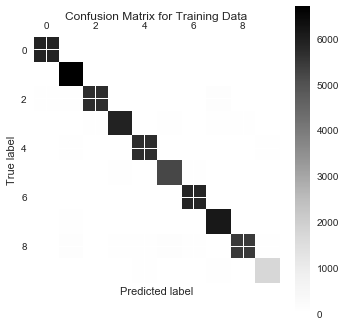

In [47]:
train_conf_mat = confusion_matrix(y_train,y_train_pred)
plt.matshow(train_conf_mat)
plt.title('Confusion Matrix for Training Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [37]:
#Priting the error values of the confusion matrix

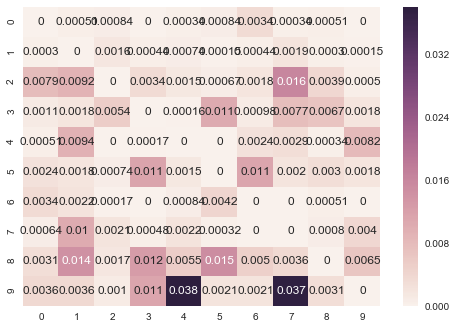

In [43]:
import seaborn as sns
val_row= train_conf_mat.sum(axis=1, keepdims=True)
train_err_conf_mat = train_conf_mat / val_row
np.fill_diagonal(train_err_conf_mat, 0)
ax = sns.heatmap(train_err_conf_mat,annot=True)
plt.show()

In [20]:
#Chose the suitable n_neighbor and performing the fit
#Testing the model
#Calculating the accuracy of the test data

In [21]:
clf = KNeighborsClassifier(n_jobs=10, weights='distance')
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Test Data Accuracy: %.2f%%" % (accuracy*100))

Test Data Accuracy: 95.03%


In [31]:
#Printing the  confusion matrix

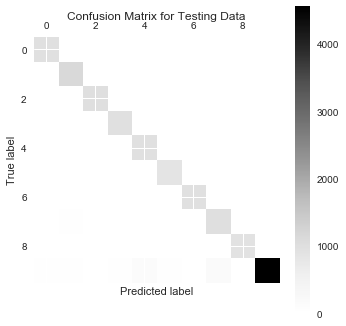

In [46]:
test_conf_mat = confusion_matrix(y_test,y_pred_test)
plt.matshow(test_conf_mat)
plt.title('Confusion Matrix for Testing Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [40]:
#Priting the error values of the confusion matrix

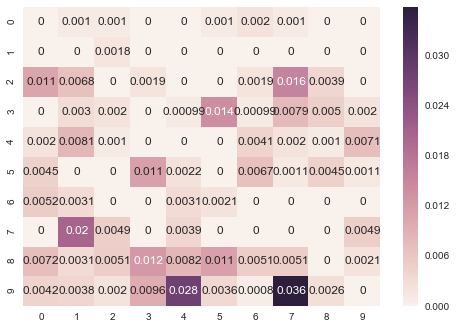

In [44]:
row_sums = test_conf_mat.sum(axis=1, keepdims=True)
norm_conf_mx = test_conf_mat / row_sums
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)
plt.show()